### Exercise 17.3

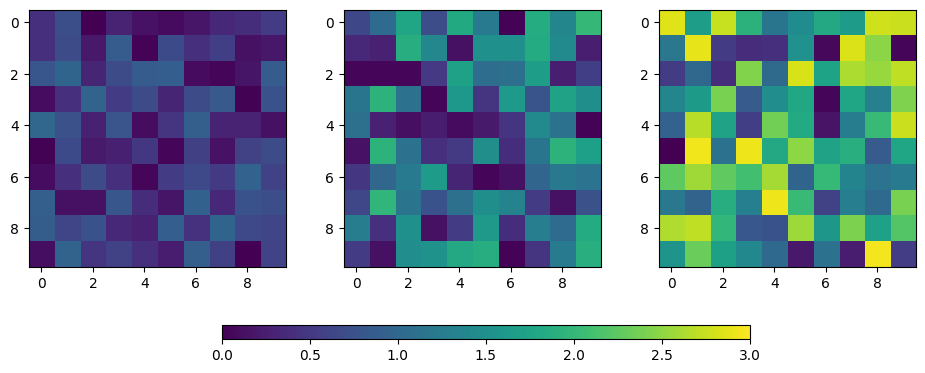

In [42]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

data1 = np.random.random((10, 10))
data2 = 2 * np.random.random((10, 10))
data3 = 3 * np.random.random((10, 10))

fig, axes = plt.subplots(ncols=3, figsize=plt.figaspect(0.5))
fig.tight_layout()

num = 0
for ax in axes.flat:
    num = num + 1
    if num == 1:
        im = ax.imshow(data1, vmin=0, vmax=3)
    elif num == 2:
        im = ax.imshow(data2, vmin=0, vmax=3)
    elif num == 3:
        im = ax.imshow(data3, vmin=0, vmax=3)
    
cax = fig.add_axes([0.25, 0.1, 0.55, 0.03])
fig.colorbar(im, cax=cax, orientation='horizontal')
plt.show()

### Exercise 17.4

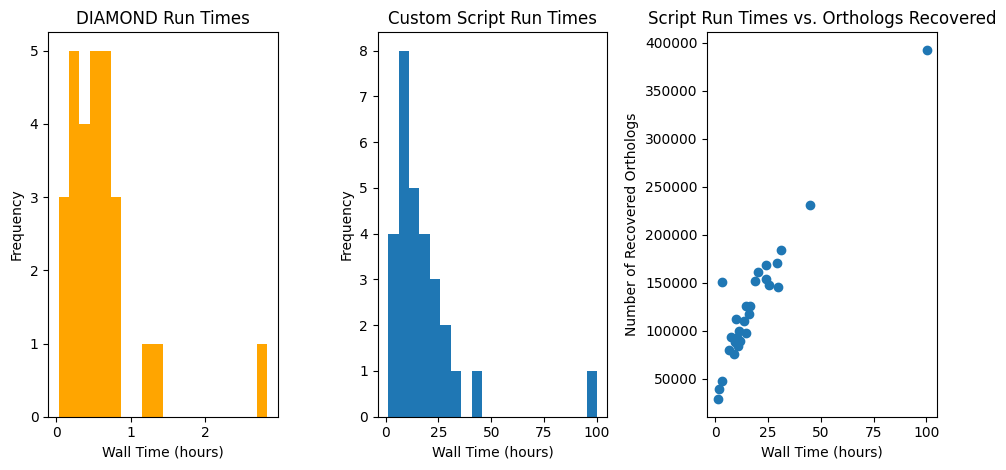

To streamline orthology inference for organisms with high suspected paralog content, I designed a custom python script that screens annotated
assemblies for orthologs. This script uses DIAMOND results to identify multi-copy genes for filtering. The run time for DIAMOND varies between
samples, but does not exceed 3 hours. The custom python script in contrast exhibits a much longer run time of usually less than 25 hours. However, 
one outlier demonstrated a run time of slightly over 100 hours. The run time for this script is correlated with the number of orthlogs recovered,
as the figure presented demonstrates a clearly positive relationship between the two. Despite the time required for this custom script, it requies
only one core to function, making it parallelizeable. Further examination of the recovered data is necessary to evaluate the utility of this custom
pipeline.


In [36]:
import pandas as pd
import matplotlib.pyplot as plt

fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=plt.figaspect(0.5))

diamond_times = pd.read_csv("../filtering_paralogs/diamond_times.csv", sep=",",header=None)
diamond_times = list(diamond_times[1])

ax1.hist(diamond_times, bins = 20, color = "orange")
ax1.set_title('DIAMOND Run Times')
ax1.set_xlabel('Wall Time (hours)')
ax1.set_ylabel('Frequency')

script_details = pd.read_csv("../filtering_paralogs/LFSC_507_final_project_data_sample.csv", sep=",")
script_times = list(script_details["wall_time_hours"])

ax2.hist(script_times, bins = 20)
ax2.set_title('Custom Script Run Times')
ax2.set_xlabel('Wall Time (hours)')
ax2.set_ylabel('Frequency')

ogs_found = list(script_details["ogs_found"])

ax3.scatter(script_times,ogs_found)
ax3.set_title('Script Run Times vs. Orthologs Recovered')
ax3.set_xlabel('Wall Time (hours)')
ax3.set_ylabel('Number of Recovered Orthologs')

plt.tight_layout()
plt.show()

print("To streamline orthology inference for organisms with high suspected paralog content, I designed a custom python script that screens annotated" + "\n" + "assemblies for orthologs. This script uses DIAMOND results to identify multi-copy genes for filtering. The run time for DIAMOND varies between" + "\n" + "samples, but does not exceed 3 hours. The custom python script in contrast exhibits a much longer run time of usually less than 25 hours. However, " + "\n" + "one outlier demonstrated a run time of slightly over 100 hours. The run time for this script is correlated with the number of orthlogs recovered," + "\n" + "as the figure presented demonstrates a clearly positive relationship between the two. Despite the time required for this custom script, it requies" + "\n" + "only one core to function, making it parallelizeable. Further examination of the recovered data is necessary to evaluate the utility of this custom" + "\n" + "pipeline.")
